In [1]:
import numpy as np
from pathlib import Path
import sys
sys.path.append(str(Path().resolve().parent))
from dataset_loading import dataset

BASE_DATA_DIR = Path().resolve().parent / ".cache" / "huggingface" / "datasets" 

In [2]:
fashion_mnist = dataset.get_dataset(name="fashion_mnist", preprocess=True, to_tensor=False, flatten=False, resize=28, class_limit=10)
hebrew_chars= dataset.get_dataset(name="hebrew_chars", preprocess=True, to_tensor=False, flatten=False, resize=28, class_limit=20)
mnist = dataset.get_dataset(name="mnist", preprocess=True, to_tensor=False, flatten=False, resize=28, class_limit=10)
kmnist = dataset.get_dataset(name="kmnist", preprocess=True, to_tensor=False, flatten=False, resize=28, class_limit=10)
math_shapes = dataset.get_dataset(name="math_shapes", preprocess=True, to_tensor=False, flatten=False, resize=28, class_limit=8)

Resolving data files:   0%|          | 0/5093 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/12000 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/4000 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/4000 [00:00<?, ?it/s]

In [3]:
print("Hebrew chars: ",hebrew_chars)
print("Fashion MNIST: ", fashion_mnist)
print("MNIST: ", mnist)
print("KMNIST: ", kmnist)
print("Math Shapes: ", math_shapes)

Hebrew chars:  [DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 3710
    })
})]
Fashion MNIST:  [DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})]
MNIST:  [DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})]
KMNIST:  [DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})]
Math Shapes:  [DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 12000
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 4000
    })
    test: Dataset({
        features:

In [4]:
train_fashion_mnist = fashion_mnist[0]["train"]
test_fashion_mnist = fashion_mnist[0]["test"]

train_hebrew_chars = hebrew_chars[0]["train"]

train_mnist = mnist[0]["train"]
test_mnist = mnist[0]["test"]

train_kmnist = kmnist[0]["train"]
test_kmnist = kmnist[0]["test"]

train_math_shapes = math_shapes[0]["train"]
test_math_shapes = math_shapes[0]["test"]

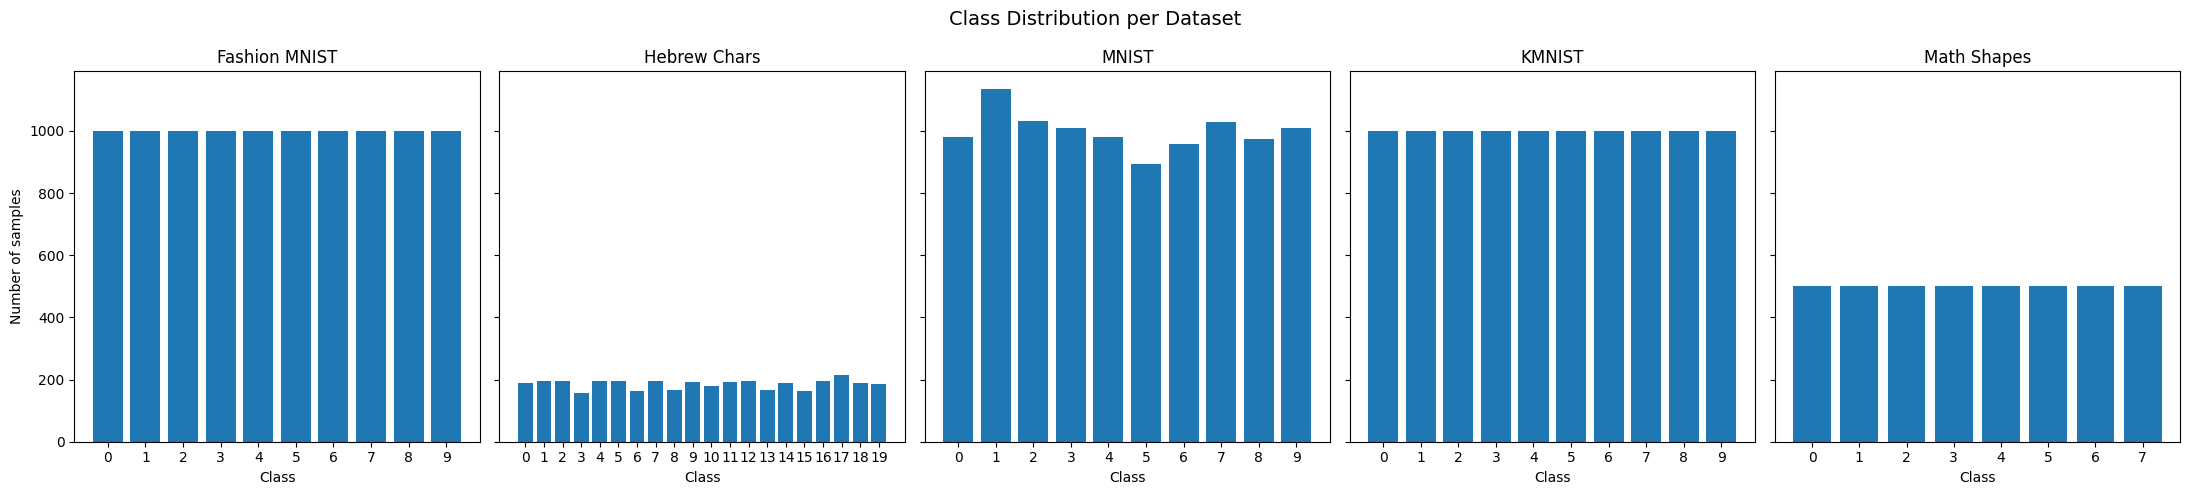

In [5]:
import matplotlib.pyplot as plt

datasets = {
    "Fashion MNIST": test_fashion_mnist,
    "Hebrew Chars": train_hebrew_chars,
    "MNIST": test_mnist,
    "KMNIST": test_kmnist,
    "Math Shapes": test_math_shapes
}

fig, axes = plt.subplots(1, len(datasets), figsize=(22, 5), sharey=True)

for ax, (name, data) in zip(axes, datasets.items()):
    labels = data["label"]
    unique, counts = np.unique(labels, return_counts=True)

    ax.bar(unique, counts)
    ax.set_title(name)
    ax.set_xlabel("Class")
    ax.set_xticks(unique)

axes[0].set_ylabel("Number of samples")
fig.suptitle("Class Distribution per Dataset", fontsize=14)

plt.tight_layout()
plt.show()


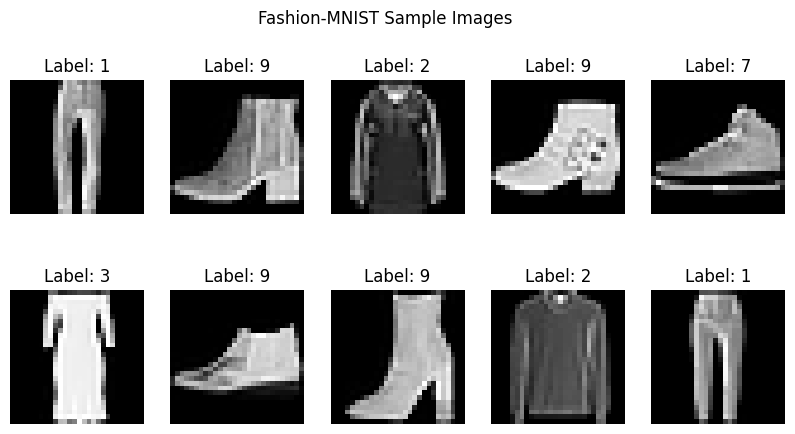

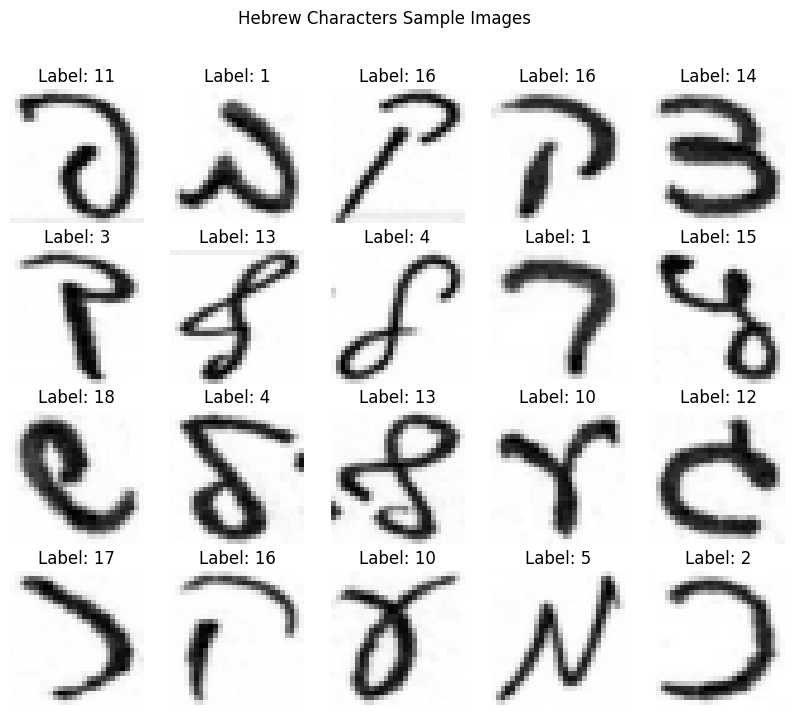

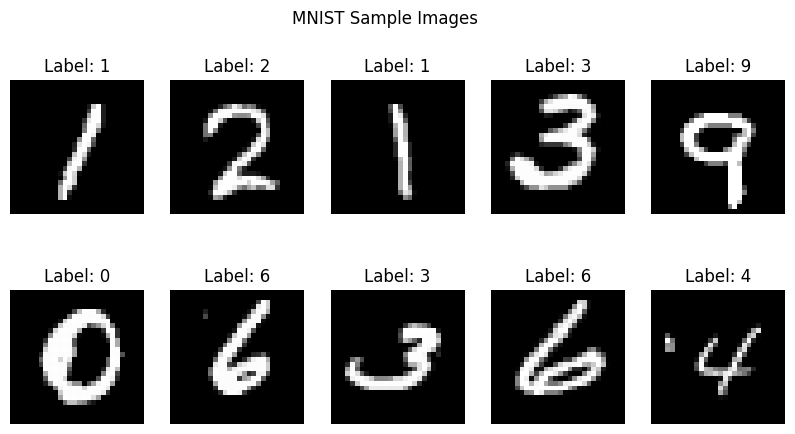

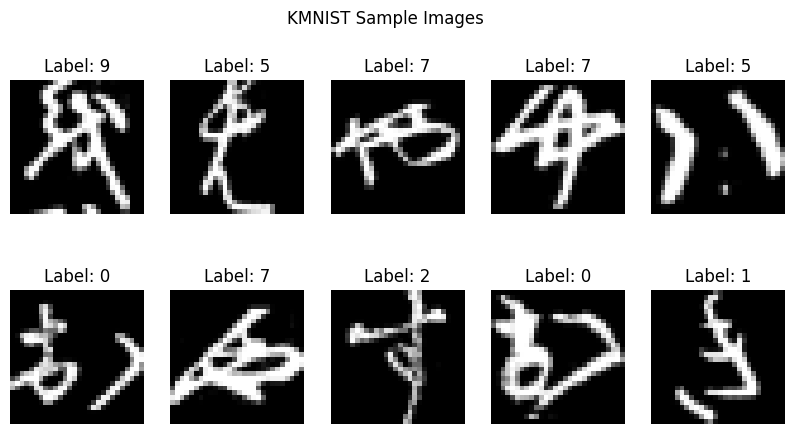

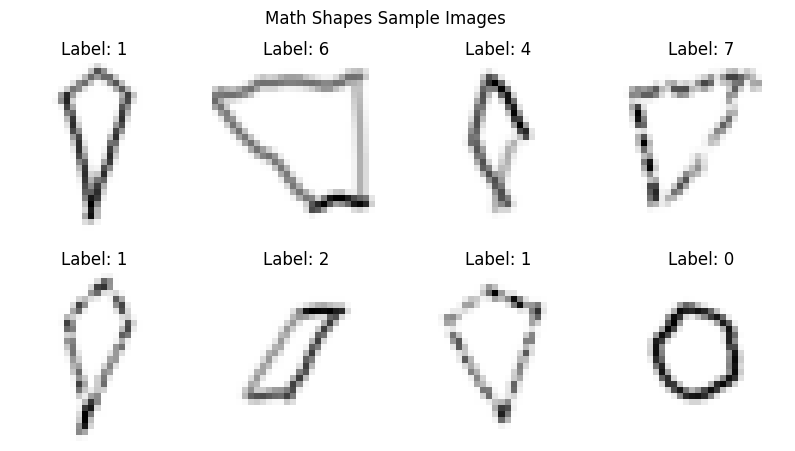

In [6]:
fig, axs = plt.subplots(2,5, figsize=(10,5))
for i in range(10):
    ax = axs[i//5, i%5]
    random_index = np.random.randint(len(train_fashion_mnist))
    ax.imshow(train_fashion_mnist[random_index]["image"], cmap='gray')
    ax.set_title(f"Label: {train_fashion_mnist[random_index]['label']}")
    ax.axis('off')
    plt.suptitle("Fashion-MNIST Sample Images")

fig, axs = plt.subplots(4,5, figsize=(10,8))
for i in range(20):
    ax = axs[i//5, i%5]
    random_index = np.random.randint(len(train_hebrew_chars))
    ax.imshow(train_hebrew_chars[random_index]["image"], cmap='gray')
    ax.set_title(f"Label: {train_hebrew_chars[random_index]['label']}")
    ax.axis('off')
    plt.suptitle("Hebrew Characters Sample Images")

fig, axs = plt.subplots(2,5, figsize=(10,5))
for i in range(10):
    ax = axs[i//5, i%5]
    random_index = np.random.randint(len(train_mnist))
    ax.imshow(train_mnist[random_index]["image"], cmap='gray')
    ax.set_title(f"Label: {train_mnist[random_index]['label']}")
    ax.axis('off')
    plt.suptitle("MNIST Sample Images")

fig, axs = plt.subplots(2,5, figsize=(10,5))
for i in range(10):
    ax = axs[i//5, i%5]
    random_index = np.random.randint(len(train_kmnist))
    ax.imshow(train_kmnist[random_index]["image"], cmap='gray')
    ax.set_title(f"Label: {train_kmnist[random_index]['label']}")
    ax.axis('off')
    plt.suptitle("KMNIST Sample Images")

fig, axs = plt.subplots(2,4, figsize=(10,5))
for i in range(8):
    ax = axs[i//4, i%4]
    random_index = np.random.randint(len(train_math_shapes))
    ax.imshow(train_math_shapes[random_index]["image"], cmap='gray')
    ax.set_title(f"Label: {train_math_shapes[random_index]['label']}")
    ax.axis('off')
    plt.suptitle("Math Shapes Sample Images")

In [7]:
from utils.vae_net import VAE
import torch
vae_fashion_mnist = VAE(w=28, h=28, ls_dim=10, in_channels=1)
vae_kmnist = VAE(w=28, h=28, ls_dim=10, in_channels=1)
vae_mnist = VAE(w=28, h=28, ls_dim=10, in_channels=1)
vae_hebrew_chars = VAE(w=28, h=28, ls_dim=10, in_channels=1)
vae_math_shapes= VAE(w=28, h=28, ls_dim=10, in_channels=1)

ckpt = torch.load(Path().resolve().parent / "models" / "5_epochs" / "fashion_mnist_head_10.pth", map_location="cuda")
vae_fashion_mnist.load_state_dict(ckpt["hyper_state_dict"])
vae_fashion_mnist.to("cuda")
vae_fashion_mnist.eval()

ckpt = torch.load(Path().resolve().parent / "models" / "5_epochs" / "kmnist_head_10.pth", map_location="cuda")
vae_kmnist.load_state_dict(ckpt["hyper_state_dict"])
vae_kmnist.to("cuda")
vae_kmnist.eval()       

ckpt = torch.load(Path().resolve().parent / "models" / "5_epochs" / "mnist_head_10.pth", map_location="cuda")
vae_mnist.load_state_dict(ckpt["hyper_state_dict"])
vae_mnist.to("cuda")
vae_mnist.eval()

ckpt = torch.load(Path().resolve().parent / "models" / "5_epochs" / "hebrew_chars_head_10.pth", map_location="cuda")
vae_hebrew_chars.load_state_dict(ckpt["hyper_state_dict"])
vae_hebrew_chars.to("cuda")
vae_hebrew_chars.eval()

ckpt = torch.load(Path().resolve().parent / "models" / "5_epochs" / "math_shapes_head_10.pth", map_location="cuda")
vae_math_shapes.load_state_dict(ckpt["hyper_state_dict"])
vae_math_shapes.to("cuda")
vae_math_shapes.eval()

VAE(
  (encoder): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (shortcut): Conv2d(1, 32, kernel_size=(1, 1), stride=(2, 2), bias=False)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (shortcut): Conv2d(32, 64, kernel_size=(1, 1), stride=(2, 2), bias=False)
    )
    (2): ResidualBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (shortcut): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
  )
  (decoder): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Co

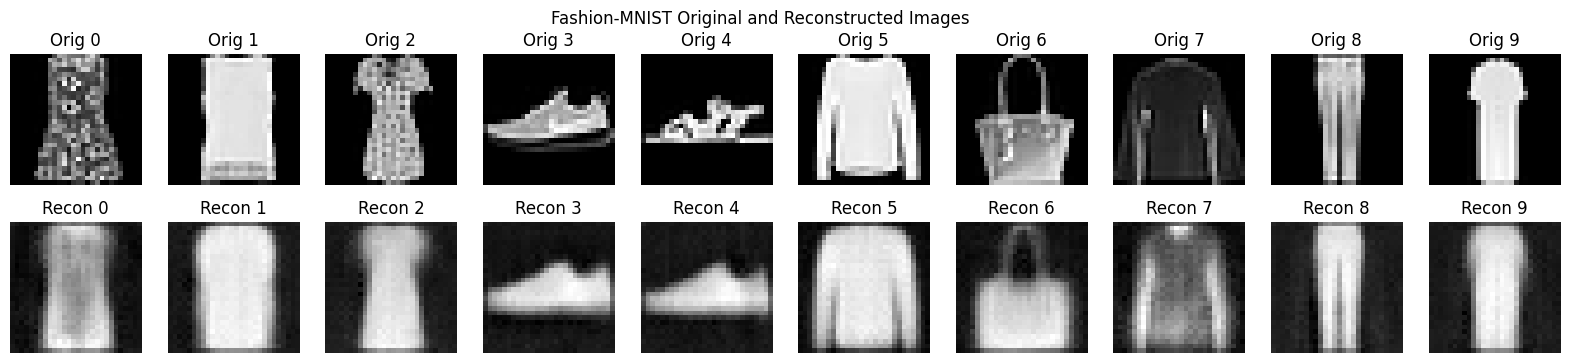

In [8]:
with torch.no_grad():
    sample_imgs = []
    for i in range(10):
        random_index = np.random.randint(len(test_fashion_mnist))
        img = test_fashion_mnist[random_index]["image"]
        img = np.array(img)
        img_tensor = torch.tensor(img).unsqueeze(0).unsqueeze(0).float().to("cuda") / 255.0
        recon_img, _, _ = vae_fashion_mnist(img_tensor)
        sample_imgs.append((img_tensor.squeeze().cpu().numpy(), recon_img.squeeze().cpu().numpy()))
    
    fig, axs = plt.subplots(2,10, figsize=(20,4))
    for i, (orig, recon) in enumerate(sample_imgs):
        axs[0,i].imshow(orig, cmap='gray')
        axs[0,i].set_title(f"Orig {i}")
        axs[0,i].axis('off')
        axs[1,i].imshow(recon, cmap='gray')
        axs[1,i].set_title(f"Recon {i}")
        axs[1,i].axis('off')
    plt.suptitle("Fashion-MNIST Original and Reconstructed Images")

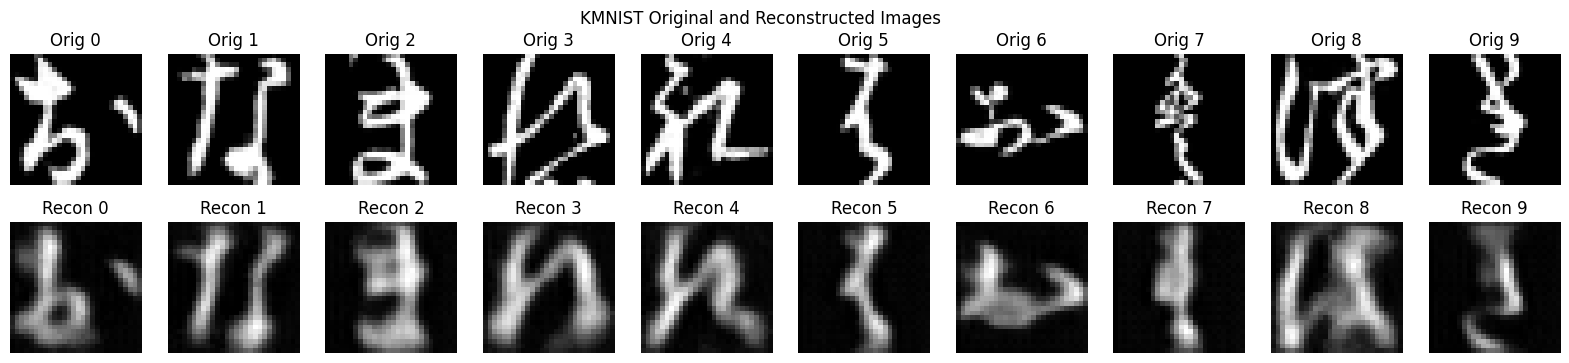

In [9]:
with torch.no_grad():
    sample_imgs = []
    for i in range(10):
        random_index = np.random.randint(len(test_kmnist))
        img = test_kmnist[random_index]["image"]
        img = np.array(img)
        img_tensor = torch.tensor(img).unsqueeze(0).unsqueeze(0).float().to("cuda") / 255.0
        recon_img, _, _ = vae_kmnist(img_tensor)
        sample_imgs.append((img_tensor.squeeze().cpu().numpy(), recon_img.squeeze().cpu().numpy()))
    
    fig, axs = plt.subplots(2,10, figsize=(20,4))
    for i, (orig, recon) in enumerate(sample_imgs):
        axs[0,i].imshow(orig, cmap='gray')
        axs[0,i].set_title(f"Orig {i}")
        axs[0,i].axis('off')
        axs[1,i].imshow(recon, cmap='gray')
        axs[1,i].set_title(f"Recon {i}")
        axs[1,i].axis('off')
    plt.suptitle("KMNIST Original and Reconstructed Images")

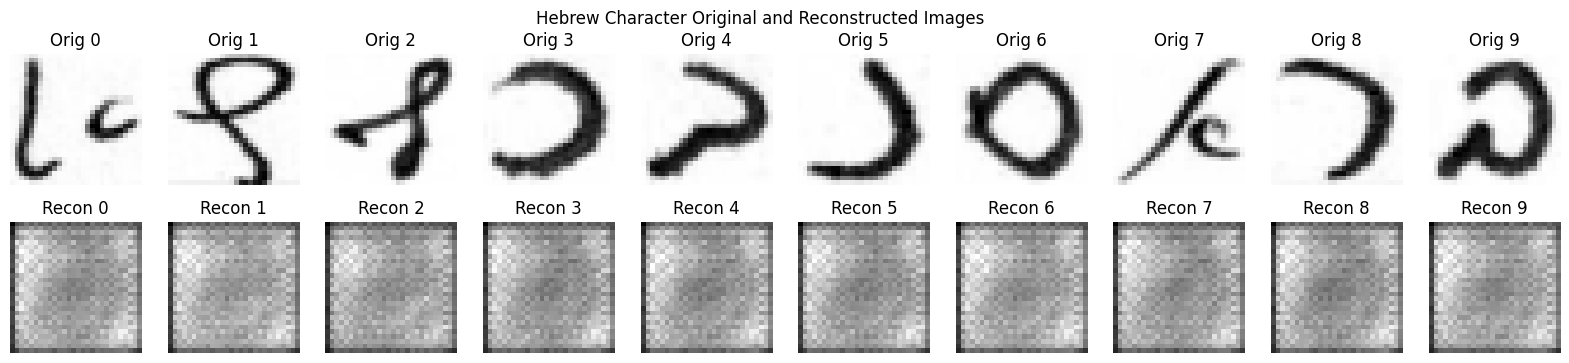

In [10]:
with torch.no_grad():
    sample_imgs = []
    for i in range(10):
        random_index = np.random.randint(len(train_hebrew_chars))
        img = train_hebrew_chars[random_index]["image"]
        img = np.array(img)
        img_tensor = torch.tensor(img).unsqueeze(0).unsqueeze(0).float().to("cuda") / 255.0
        recon_img, _, _ = vae_hebrew_chars(img_tensor)
        sample_imgs.append((img_tensor.squeeze().cpu().numpy(), recon_img.squeeze().cpu().numpy()))
    
       
    fig, axs = plt.subplots(2,10, figsize=(20,4))
    for i, (orig, recon) in enumerate(sample_imgs):
        axs[0,i].imshow(orig, cmap='gray')
        axs[0,i].set_title(f"Orig {i}")
        axs[0,i].axis('off')
        axs[1,i].imshow(recon, cmap='gray')
        axs[1,i].set_title(f"Recon {i}")
        axs[1,i].axis('off')
    plt.suptitle("Hebrew Character Original and Reconstructed Images")
    

torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])


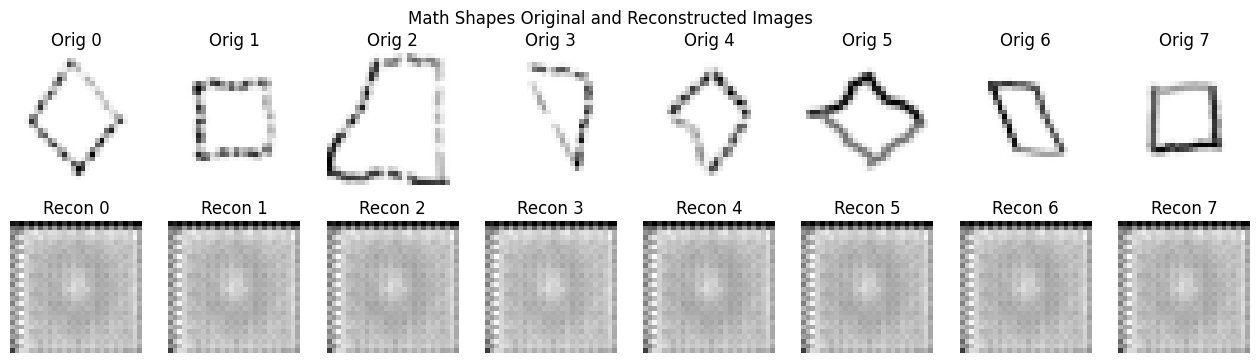

In [11]:
with torch.no_grad():
    sample_imgs = []
    for i in range(8):
        random_index = np.random.randint(len(test_math_shapes))
        img = test_math_shapes[random_index]["image"]
        img = np.array(img)
        img_tensor = torch.tensor(img).unsqueeze(0).unsqueeze(0).float().to("cuda") / 255.0
        print(img_tensor.shape)
        recon_img, _, _ = vae_math_shapes(img_tensor)
        sample_imgs.append((img_tensor.squeeze().cpu().numpy(), recon_img.squeeze().cpu().numpy()))
    
    fig, axs = plt.subplots(2,8, figsize=(16,4))
    for i, (orig, recon) in enumerate(sample_imgs):
        axs[0,i].imshow(orig, cmap='gray')
        axs[0,i].set_title(f"Orig {i}")
        axs[0,i].axis('off')
        axs[1,i].imshow(recon, cmap='gray')
        axs[1,i].set_title(f"Recon {i}")
        axs[1,i].axis('off')
    plt.suptitle("Math Shapes Original and Reconstructed Images")   

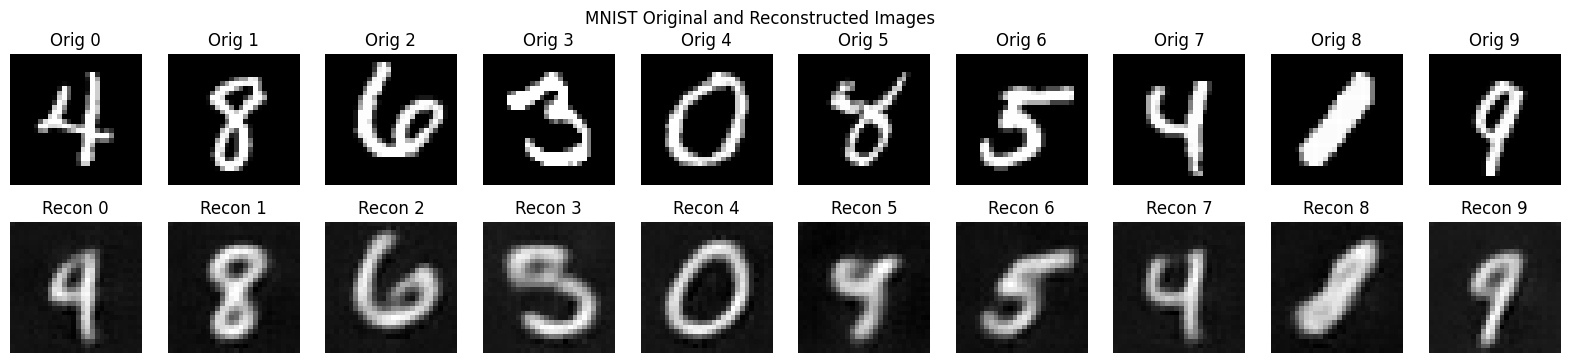

In [12]:
with torch.no_grad():
    sample_imgs = []
    for i in range(10):
        random_index = np.random.randint(len(test_mnist))
        img = test_mnist[random_index]["image"]
        img = np.array(img) #Flatten PIL image to numpy array
        img_tensor = torch.tensor(img).unsqueeze(0).unsqueeze(0).float().to("cuda") / 255.0
        recon_img, _, _ = vae_mnist(img_tensor)
        sample_imgs.append((img_tensor.squeeze().cpu().numpy(), recon_img.squeeze().cpu().numpy())) 
        
    fig, axs = plt.subplots(2,10, figsize=(20,4))
    for i, (orig, recon) in enumerate(sample_imgs):
        axs[0,i].imshow(orig, cmap='gray')
        axs[0,i].set_title(f"Orig {i}")
        axs[0,i].axis('off')
        axs[1,i].imshow(recon, cmap='gray')
        axs[1,i].set_title(f"Recon {i}")
        axs[1,i].axis('off')
    plt.suptitle("MNIST Original and Reconstructed Images")          

# ANALYSIS

### VAE LATENT SPACE VISUALIZATION WITH UMAP

In [13]:
import pandas as pd
#VAE latent space analysis UMAP
# Get trained VAE
ckpt = torch.load(Path().resolve().parent / "models" / "5_epochs" / "mnist_head_10.pth", map_location="cuda")
vae_mnist.load_state_dict(ckpt["hyper_state_dict"])
vae_mnist.to("cuda")
vae_mnist.eval()

# extract samples from TEST set 10 samples from class 0,1,3, as we don't want to check memorization but generalization of gemotric shapes
test_mnist_parquet = pd.DataFrame(test_mnist)
selected_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
samples_per_class = 200  # or None for all

mus_mnist = []
labels_mnist = []

with torch.no_grad():
    for c in selected_classes:
        rows = test_mnist_parquet[test_mnist_parquet["label"] == c]
        rows = rows.sample(n=min(samples_per_class, len(rows)), random_state=42)

        imgs = np.stack(rows["image"].values)
        imgs = torch.tensor(imgs).unsqueeze(1).float().to("cuda") / 255.0

        _, mu_mnist, _ = vae_mnist(imgs)
        mus_mnist.append(mu_mnist.cpu().numpy())
        labels_mnist.extend([c] * mus_mnist[-1].shape[0])

mus_mnist = np.concatenate(mus_mnist, axis=0)
labels_mnist = np.array(labels_mnist)



/home/s6019595/UDL-MetaTrainingHyperNetwork/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/s6019595/UDL-MetaTrainingHyperNetwork/.venv/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:373: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


Text(0.5, 1.0, 'VAE MNIST Latent Space UMAP Projection')

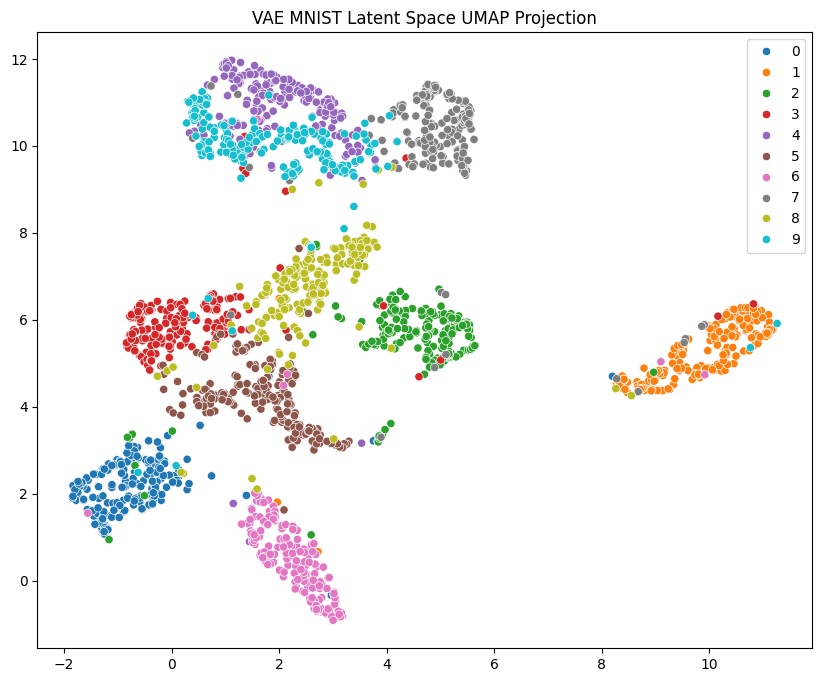

In [14]:
import umap
import seaborn as sns
reducer = umap.UMAP(n_neighbors=20, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(np.array(mus_mnist))
plt.figure(figsize=(10,8))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=labels_mnist, palette="tab10")
plt.title("VAE MNIST Latent Space UMAP Projection")

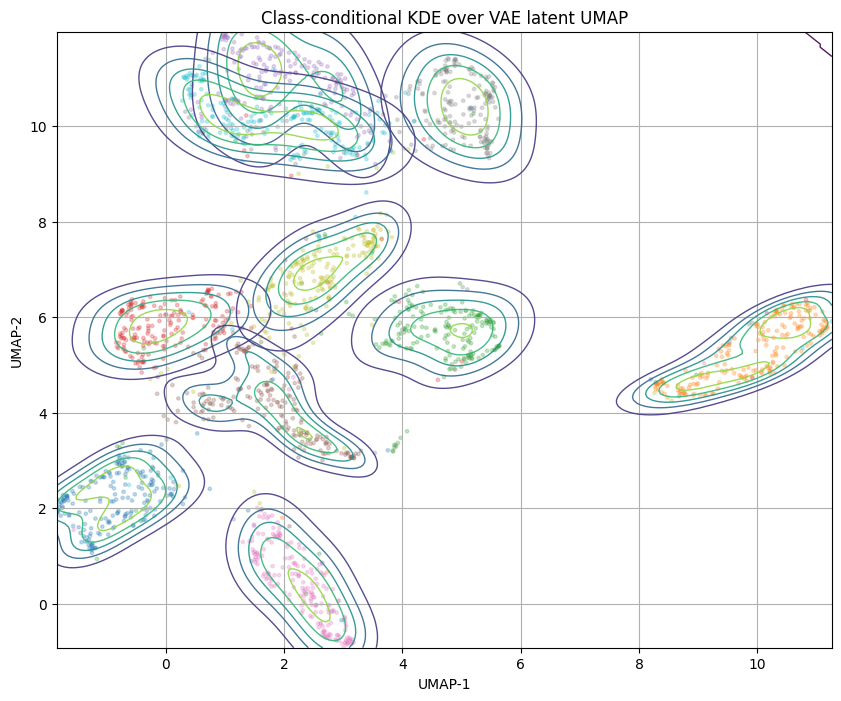

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Configuration
classes = np.unique(labels_mnist)
bandwidth = None  # let gaussian_kde choose (Scott's rule)
grid_res = 200

# Fix plot limits so geometry is comparable across runs
x_min, x_max = embedding[:, 0].min(), embedding[:, 0].max()
y_min, y_max = embedding[:, 1].min(), embedding[:, 1].max()

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, grid_res),
    np.linspace(y_min, y_max, grid_res)
)
grid = np.vstack([xx.ravel(), yy.ravel()])

plt.figure(figsize=(10, 8))

# Scatter points (faint, for reference)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=labels_mnist,
    s=6,
    cmap="tab10",
    alpha=0.25
)

# KDE contours per class
for c in classes:
    mask = labels_mnist == c
    points = embedding[mask].T  # shape (2, Nc)

    if points.shape[1] < 10:
        continue  # KDE not stable with very few points

    kde = gaussian_kde(points, bw_method=bandwidth)
    density = kde(grid).reshape(xx.shape)

    plt.contour(
        xx, yy, density,
        levels=5,
        linewidths=1,
        alpha=0.9
    )

plt.title("Class-conditional KDE over VAE latent UMAP")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()


In [16]:
import numpy as np
import pandas as pd
import torch
from pathlib import Path

datasets_cfg = {
    "mnist": {
        "data": test_mnist,
        "vae": vae_mnist,
        "ckpt": "mnist_head_10.pth",
        "num_classes": 10,
    },
    "kmnist": {
        "data": test_kmnist,
        "vae": vae_kmnist,
        "ckpt": "kmnist_head_10.pth",
        "num_classes": 10,
    },
    "fashion_mnist": {
        "data": test_fashion_mnist,
        "vae": vae_fashion_mnist,
        "ckpt": "fashion_mnist_head_10.pth",
        "num_classes": 10,
    },
    "hebrew_chars": {
        "data": train_hebrew_chars,
        "vae": vae_hebrew_chars,
        "ckpt": "hebrew_chars_head_10.pth",
        "num_classes": 20,
    },
    "math_shapes": {
        "data": test_math_shapes,
        "vae": vae_math_shapes,
        "ckpt": "math_shapes_head_10.pth",
        "num_classes": 8,
    },
}


In [17]:
def umap_for_dataset(
    data,
    vae,
    ckpt_path,
    samples_per_class=500,
    device="cuda",
    umap_kwargs=None,
):
    df = pd.DataFrame(data)

    ckpt = torch.load(ckpt_path, map_location=device)
    vae.load_state_dict(ckpt["hyper_state_dict"])
    vae.to(device)
    vae.eval()

    mus = []
    labels = []

    with torch.no_grad():
        for c in sorted(df["label"].unique()):
            rows = df[df["label"] == c]

            if samples_per_class is not None:
                rows = rows.sample(
                    n=min(samples_per_class, len(rows)),
                    random_state=42,
                )

            imgs = np.stack(rows["image"].values)
            imgs = (
                torch.tensor(imgs)
                .unsqueeze(1)
                .float()
                .to(device) / 255.0
            )

            _, mu, _ = vae(imgs)
            mu = mu.cpu().numpy()

            mus.append(mu)
            labels.extend([c] * mu.shape[0])

    mus = np.concatenate(mus, axis=0)
    labels = np.array(labels)

    umap_model = umap.UMAP(
        n_neighbors=20,
        min_dist=0.1,
        random_state=42,
        **(umap_kwargs or {}),
    )

    embedding = umap_model.fit_transform(mus)

    return embedding, labels


/home/s6019595/UDL-MetaTrainingHyperNetwork/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/s6019595/UDL-MetaTrainingHyperNetwork/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/s6019595/UDL-MetaTrainingHyperNetwork/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


FileNotFoundError: [Errno 2] No such file or directory: '/home/s6019595/UDL-MetaTrainingHyperNetwork/models/hebrew_chars_head_10.pth'

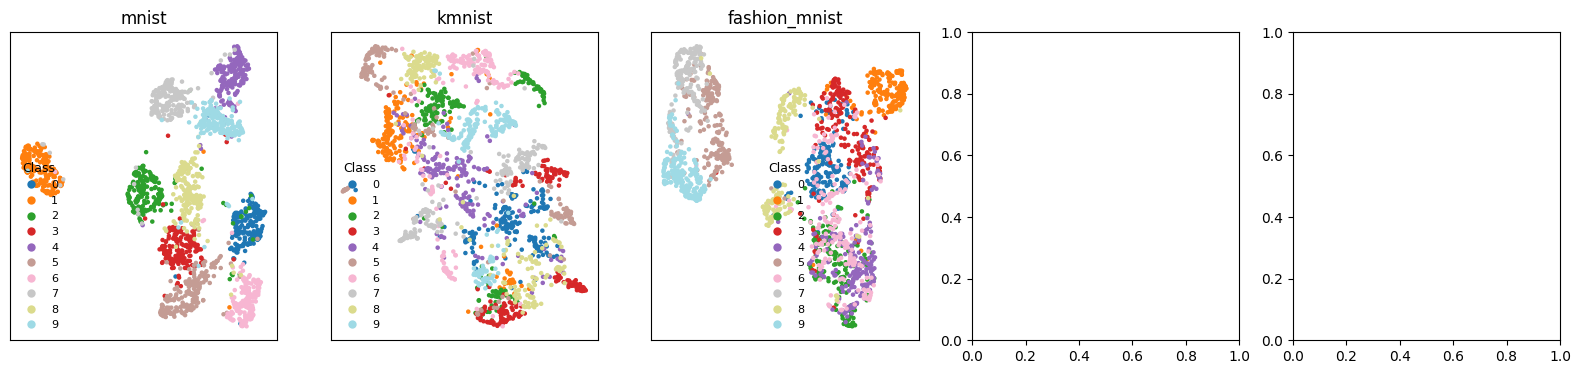

In [18]:
from matplotlib.lines import Line2D
import numpy as np

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
base_ckpt_dir = Path().resolve().parent / "models"

cmap = plt.get_cmap("tab20")

for ax, (name, cfg) in zip(axes, datasets_cfg.items()):
    emb, labels = umap_for_dataset(
        data=cfg["data"],
        vae=cfg["vae"],
        ckpt_path=base_ckpt_dir / cfg["ckpt"],
        samples_per_class=200,
    )

    ax.scatter(
        emb[:, 0],
        emb[:, 1],
        c=labels,
        s=5,
        cmap=cmap,
    )

    ax.set_title(name)
    ax.set_xticks([])
    ax.set_yticks([])

    # ---- per-axis legend ----
    unique_labels = np.unique(labels)

    legend_handles = [
        Line2D(
            [0], [0],
            marker="o",
            linestyle="",
            markersize=6,
            markerfacecolor=cmap(c / max(unique_labels)),
            markeredgecolor="none",
            label=str(c),
        )
        for c in unique_labels
    ]

    ax.legend(
        handles=legend_handles,
        title="Class",
        loc="best",
        fontsize=8,
        title_fontsize=9,
        frameon=False,
    )

plt.tight_layout()
plt.show()


### TARGET NETWORK EMBEDDINGS OVER TIME

(64, 4) (64, 4) (64, 4)


/home/s6019595/UDL-MetaTrainingHyperNetwork/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


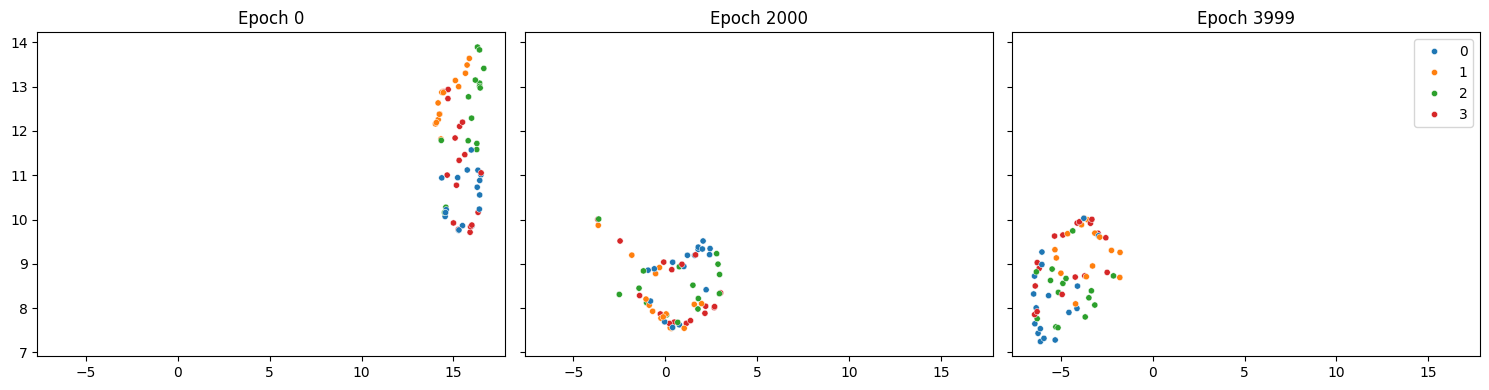

In [ ]:
# ---- load embeddings ----
data = torch.load("../models/target_embeddings_over_time.pt")

# sort epochs to ensure consistent order
epochs = sorted(data.keys())
assert len(epochs) == 3, f"Expected 3 epochs, got {epochs}"

e0, emid, eend = epochs

emb0 = data[e0]["embeddings"].numpy()
embm = data[emid]["embeddings"].numpy()
embf = data[eend]["embeddings"].numpy()
print(emb0.shape, embm.shape, embf.shape)
labels = data[e0]["labels"].numpy()

# ---- fit UMAP ONCE on all embeddings ----
all_embeddings = np.concatenate([emb0, embm, embf], axis=0)

reducer = umap.UMAP(
    n_neighbors=20,
    min_dist=0.1,
    random_state=42,
)
reducer.fit(all_embeddings)

proj0 = reducer.transform(emb0)
projm = reducer.transform(embm)
projf = reducer.transform(embf)

# ---- plot side-by-side ----
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

sns.scatterplot(
    x=proj0[:, 0], y=proj0[:, 1],
    hue=labels, palette="tab10",
    s=20, ax=axes[0], legend=False
)
axes[0].set_title(f"Epoch {e0}")

sns.scatterplot(
    x=projm[:, 0], y=projm[:, 1],
    hue=labels, palette="tab10",
    s=20, ax=axes[1], legend=False
)
axes[1].set_title(f"Epoch {emid}")

sns.scatterplot(
    x=projf[:, 0], y=projf[:, 1],
    hue=labels, palette="tab10",
    s=20, ax=axes[2]
)
axes[2].set_title(f"Epoch {eend}")

# clean layout
for ax in axes:
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()


In [19]:
data = torch.load("target_embeddings_over_time.pt", map_location="cpu")

# sort epochs
epochs = sorted(data.keys())
print(f"Loaded embeddings for {len(epochs)} epochs:")
print(epochs[:5], "...", epochs[-5:])


Loaded embeddings for 400 epochs:
[0, 10, 20, 30, 40] ... [3950, 3960, 3970, 3980, 3990]


In [20]:

all_embs = np.concatenate(
    [data[e]["embeddings"].numpy() for e in epochs],
    axis=0
)

# compute global limits with a small margin
margin = 0.05
x_min, x_max = all_embs[:, 0].min(), all_embs[:, 0].max()
y_min, y_max = all_embs[:, 1].min(), all_embs[:, 1].max()

x_pad = (x_max - x_min) * margin
y_pad = (y_max - y_min) * margin

X_LIM = (x_min - x_pad, x_max + x_pad)
Y_LIM = (y_min - y_pad, y_max + y_pad)


In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output

def plot_epoch(epoch_idx):
    clear_output(wait=True)

    epoch = epochs[epoch_idx]
    emb = data[epoch]["embeddings"].numpy()
    labels = data[epoch]["labels"].numpy()

    plt.figure(figsize=(6, 5))
    plt.scatter(
        emb[:, 0],
        emb[:, 1],
        c=labels,
        s=8,
        cmap="tab10",
        alpha=0.8
    )
    plt.xlim(*X_LIM)
    plt.ylim(*Y_LIM)
    plt.gca().set_aspect("equal", adjustable="box")

    plt.title(f"Target embedding geometry – epoch {epoch}")
    plt.xlabel("dim 1")
    plt.ylabel("dim 2")
    plt.grid(True)
    plt.show()

slider = widgets.IntSlider(
    min=0,
    max=len(epochs) - 1,
    step=1,
    value=0,
    description="Epoch idx",
    continuous_update=False
)

widgets.interact(plot_epoch, epoch_idx=slider)


interactive(children=(IntSlider(value=0, continuous_update=False, description='Epoch idx', max=399), Output())…

<function __main__.plot_epoch(epoch_idx)>

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

unique_labels = np.unique(data[epochs[0]]["labels"].numpy())
cmap = plt.get_cmap("tab10")

label_to_color = {lab: cmap(lab) for lab in unique_labels}

legend_elements = [
    Line2D(
        [0], [0],
        marker='o',
        color='w',
        label=f"Class {lab}",
        markerfacecolor=label_to_color[lab],
        markersize=6
    )
    for lab in unique_labels
]


In [23]:
from matplotlib import animation

fig, ax = plt.subplots(figsize=(6, 5))

def update(i):
    ax.clear()

    epoch = epochs[i]
    emb = data[epoch]["embeddings"].numpy()
    labels = data[epoch]["labels"].numpy()

    for lab in unique_labels:
        mask = labels == lab
        ax.scatter(
            emb[mask, 0],
            emb[mask, 1],
            s=8,
            color=label_to_color[lab],
            alpha=0.8
        )

    ax.set_xlim(*X_LIM)
    ax.set_ylim(*Y_LIM)
    ax.set_aspect("equal", adjustable="box")

    ax.set_title(f"Target embedding geometry – epoch {epoch}")
    ax.set_xlabel("dim 1")
    ax.set_ylabel("dim 2")
    ax.legend(handles=legend_elements, loc="best", fontsize=8)
    ax.grid(True)

ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(epochs),
    interval=100,
    blit=False
)

ani.save(
    "geometry_evolution_labeled.mp4",
    fps=10,
    dpi=150,
    writer="ffmpeg"
)

plt.close(fig)
